# Logistic Regression

### Introduction

In this exercice we are going to take a look at **Graduate Admissions** in relation to **CGPA** and **University Rating**.

**Dataset:** "Admission_Predict.csv"<br>

**Columns:** <br>
**"CGPA"**, range [6.0, 10.0], Cumulative Grade Point Average <br>
**"Rating"**, range [1, 5], 5 is the best university rating<br>
**"Admited"**, range [0,1] <br>

### Exercise questions:

1. If your **CGPA is 7.8**, what is the **probability** that you will be accepted in an university with a **rating of 3**?
2. If your **CGPA is 8.5**, which is the **best university** you can apply to and have a probability of more than **50%** to be accepted?
3. What should be your CGPA in order to have a probabilty of **80%** to enter in the **best rated** univesity?

## 1/ Data exploration

Before creating our model let's just **import** the dataset and take a look at the **general info** about our dataset.<br>

In [1]:
# The usual imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Dataset import
df = pd.read_csv('Graduate_Admission.csv', sep=",")
df.head()

,Rating,CGPA,Admited
0,1,4.79,0
1,1,5.33,0
2,1,5.70,0
3,1,5.05,0
4,1,5.33,0


In [3]:
# Dataset quick info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1540 entries, 0 to 1539
Data columns (total 3 columns):
Rating     1540 non-null int64
CGPA       1540 non-null float64
Admited    1540 non-null int64
dtypes: float64(1), int64(2)
memory usage: 36.2 KB


### How many rows do we have in our dataframe?

In [4]:
# Enter the answer
question_raw_number = 1470 # replace by the right value

### Which word best describe each columns?

In [5]:
type_a = "Binary"
tybe_b = "Discrete"
type_c = "Continuous"

CGPA = type_c # replace by the right type
Rating = tybe_b # replace by the right type
Admited = type_a # replace by the right type

### Ploting our data
We can do a simple **pair-plot** of our dataframe to visualise the **relations** between our **columns**.

<details>
  <summary>hint</summary>
  <a href="https://seaborn.pydata.org/generated/seaborn.pairplot.html">[Doc] seaborn.pydata.org</a>
</details>

/Users/gaetan/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/gaetan/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


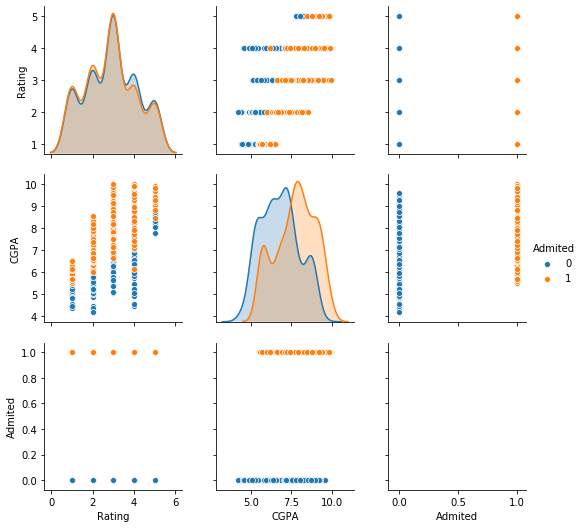

In [6]:
# Pair-plot
sns.pairplot(df, hue="Admited")

We would also like to observe more clearly the relation **for each rating**, between the **CGPA** and the **Admission**.<br>
That way we could start **estimating** what **CGPA** you need to be **admited** in each school.

<details>
  <summary>hint</summary>
  <a href="https://seaborn.pydata.org/generated/seaborn.scatterplot.html">[Doc] seaborn.pydata.org</a>
</details>

/Users/gaetan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


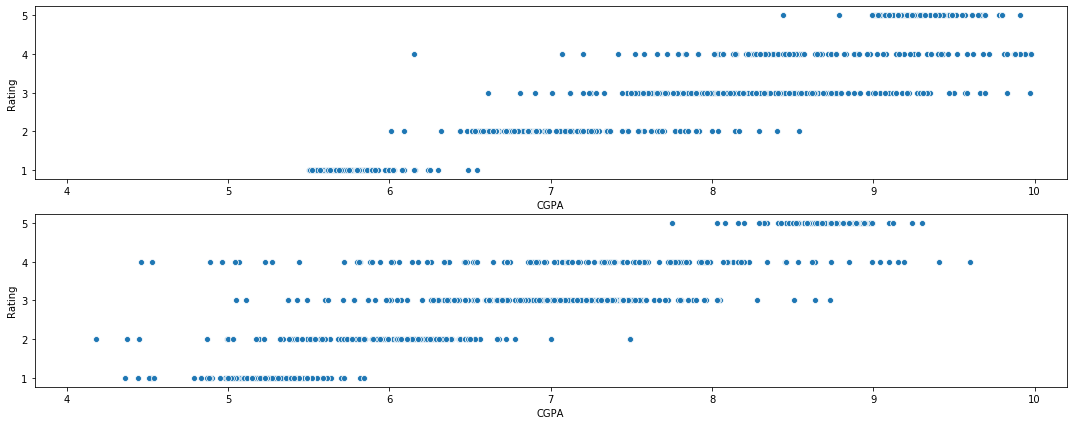

In [7]:
# Complex admission plot
fig, ax = plt.subplots(2,1)
sns.scatterplot(x="CGPA", y='Rating', data=df[df["Admited"] == 1], ax=ax[0]).set(xlim=(3.8, 10.2))
sns.scatterplot(x="CGPA", y='Rating', data=df[df["Admited"] == 0], ax=ax[1]).set(xlim=(3.8, 10.2))
fig.set_size_inches(18.5, 7)
fig.show()

## 2/ Creating a model

If we want to **predict** students **admissions** in a school we will need to create a model.
The model will also help us to get some insight about the **probability** for a student to enter a school.

What is the **type of the task** that we are trying to do here, **Regression** or **Classification**?

In [8]:
# Choose your answer
answer_a = "Regression"
answer_b = "Classification"

question_task_type = answer_b # replace by the right variable

### Trainning

For this exercise we are going to use a **Logistic Regression** model. <br>
Documentation: [scikit-learn.org/sklearn.linear_model.LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [9]:
# Separate the parameters (X = ['Rating', 'CGPA']) from the hyperparameter (y = "Admited")
X = df.drop(columns=['Admited'])
y = df['Admited']

In [10]:
# import the Logistic Regression model
from sklearn.linear_model import LogisticRegression

In [11]:
# Train the model with the prepared data
logmodel = LogisticRegression()
logmodel.fit(X, y)

/Users/gaetan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Test the model

Before we start using our model let's just make sure the **predictions** are working.<br>
So let's make two easy predictions.<br>
For a school **rated 5**:
- a student with a **CGPA of 5** should **not be** admited.
- a student with a **CGPA of 10** should **be** admited.

You can use the following dataset: `{"Rating": [5,5], "CGPA": [5,10]}`

In [12]:
test_data = {"Rating": [5,5], "CGPA": [5.0,10.0]}
test_df = pd.DataFrame(data=test_data)

predictions = logmodel.predict(test_df)

question_simple_prediction = predictions # replace by the model prediction for {"Rating": [5,5], "CGPA": [5,10]}
predictions

array([0, 1])

## 3/ Using our model

Nice! Now that our **model is ready** we can start looking for **answers** to our **initial questions**. 🚀 

1. If your **CGPA is 7.8**, what is the **probability** that you will be accepted in an university with a **rating of 3**?

In [20]:
data = {"Rating": [3], "CGPA": [7.8]}
question_df = pd.DataFrame(data=data)
predictions = logmodel.predict_proba(question_df)
predictions

array([[0.25898219, 0.74101781]])

In [21]:
# Enter your answer to question 1 here

question_1_answer = 0.74 # replace by the right answer, rounded to the second decimal (ex: 4.32)

2. If your **CGPA is 8.5**, which is the **best university** you can apply to and have a probability of more than **50%** to be accepted?

In [15]:
data = {"Rating": [1,2,3,4,5], "CGPA": [8.5,8.5,8.5,8.5,8.5]}
question_df = pd.DataFrame(data=data)
predictions = logmodel.predict_proba(question_df)
predictions

array([[6.82284795e-04, 9.99317715e-01],
       [6.40479519e-03, 9.93595205e-01],
       [5.73682343e-02, 9.42631766e-01],
       [3.64916710e-01, 6.35083290e-01],
       [8.44357061e-01, 1.55642939e-01]])

In [16]:
# Enter your answer to question 2 here

question_2_answer = 4 # replace by the right raring number

3. What should be your CGPA in order to have a probabilty of **80%** to enter in the **best rated** university?

In [17]:
data = {"Rating": [5,5,5,5,5], "CGPA": [8,8.5,9,9.5,9.8]}
question_df = pd.DataFrame(data=data)
predictions = logmodel.predict_proba(question_df)
predictions[:,1]

array([0.05023393, 0.15564294, 0.39114616, 0.69126012, 0.82565278])

In [18]:
# Enter your answer to question 3 here

question_3_answer = 9.8 # replace by the right answer, rounded to the first decimal (ex: 4.3)

### (Optional)

This **dataset** has been **generated** and the model behind it look like this:
<details>
  <summary>🚫Open only if you have completed the exercise 🚫</summary>
    <img src="https://i.ibb.co/n67YMx5/Screen-Shot-2019-09-24-at-20-31-13.png" alt="Screen-Shot-2019-09-24-at-20-31-13" border="0" width="400px">
</details>

Create a **line plot** of the model you have created.

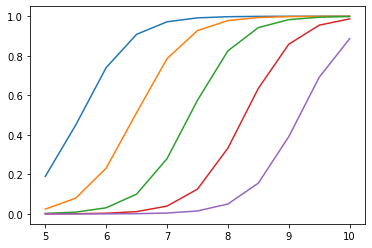

In [19]:
data = {"Rating": [1,1,1,1,1,1,1,1,1,1,1], "CGPA": [5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10]}
question_df = pd.DataFrame(data=data)
predictions = logmodel.predict_proba(question_df)
predictions[:,1]
plt.plot(question_df["CGPA"],predictions[:,1])

data = {"Rating": [2,2,2,2,2,2,2,2,2,2,2], "CGPA": [5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10]}
question_df = pd.DataFrame(data=data)
predictions = logmodel.predict_proba(question_df)
predictions[:,1]
plt.plot(question_df["CGPA"],predictions[:,1]) 

data = {"Rating": [3,3,3,3,3,3,3,3,3,3,3], "CGPA": [5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10]}
question_df = pd.DataFrame(data=data)
predictions = logmodel.predict_proba(question_df)
predictions[:,1]
plt.plot(question_df["CGPA"],predictions[:,1])

data = {"Rating": [4,4,4,4,4,4,4,4,4,4,4], "CGPA": [5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10]}
question_df = pd.DataFrame(data=data)
predictions = logmodel.predict_proba(question_df)
predictions[:,1]
plt.plot(question_df["CGPA"],predictions[:,1]) 

data = {"Rating": [5,5,5,5,5,5,5,5,5,5,5], "CGPA": [5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10]}
question_df = pd.DataFrame(data=data)
predictions = logmodel.predict_proba(question_df)
predictions[:,1]
plt.plot(question_df["CGPA"],predictions[:,1]) 
plt.show()